In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
price_df = pd.read_excel(r"D:\kinto旗舰店开设\保温杯销售.xlsx")

In [3]:
price_df["月份"]=pd.to_datetime(price_df["时间"],format="%Y-%m-%d")
price_df["年"]=price_df["月份"].dt.year

In [3]:
def price_layer(price,price_top,price_gap):
    if price>price_top:
            priceLayer=str(price_top)+"-"
    else:
        for p in range(0,price_top,price_gap):
            if price>=p:
                priceLayer=str(p)+"-"+str(p+price_gap)
            else:
                continue
    return priceLayer

In [12]:
import re
def match_number(s):
    s = str(s)
    pattern = r"^[0-9]+(\.[0-9]+)?$"
    match = re.search(pattern, s)  
    if match:
        new_rongliang = match.group(1)
        if new_rongliang<10:
            new_rongliang = new_rongliang*1000
        else:
            new_rongliang = new_rongliang
    else:
        new_rongliang = 0
    return new_rongliang

In [4]:
price_df["价格带"]=price_df["价格"].apply(lambda x:price_layer(x,400,50))

In [13]:
price_df["容量_清洗"] = price_df["容量"].apply(lambda x :match_number(x))

In [14]:
suishoubeidf = price_df[price_df["3级类目名"].isin(["保温杯","保温壶"])]
suishoubeidf = price_df[price_df["3级类目名"].isin(["太空杯","随手杯"])]

In [15]:
suishoubeitopList = "富光,supor/苏泊尔,beddybear/杯具熊,希乐,pissa,bablov,joyoung/九阳,nrmei/恩尔美,relea/物生物,disney/迪士尼,ymer,feenik/费尼克,南极人,crossover/跨界,梦创,奇古堂,aourbene,gianxi/天喜,germ,vanow".split(",")
suishoubeiUreruList ="富光,supor/苏泊尔,beddybear/杯具熊,pissa,bablov,disney/迪士尼,crossover/跨界,梦创,奇古堂,aourbene,gianxi/天喜,vanow".split(",")
suishoubeiUrenaiList = "希乐,joyoung/九阳,nrmei/恩尔美,relea/物生物,ymer,feenik/费尼克,南极人".split(",")

In [16]:
suishoubeitopList = "富光,希乐,味之享,bablov,uzspace/优之,ymer,bottled joy,蜜雪冰城,淘森林,hoomey/亲爱的,lock&lock/乐扣乐扣,云铨,venture pal,gianxi/天喜,吨吨,bemega,relea/物生物,vanow,cille,qwe".split(",")
suishoubeiUreruList ="ymer,蜜雪冰城,淘森林,hoomey/亲爱的,lock&lock/乐扣乐扣,云铨,gianxi/天喜,吨吨".split(",")
suishoubeiUrenaiList = "富光,希乐,味之享,bablov,uzspace/优之,bottled joy,venture pal,bemega,relea/物生物,vanow,cille".split(",")

In [19]:
suishoubeitopdf = suishoubeidf[suishoubeidf["品牌"].isin(suishoubeitopList)]
suishoubeitopdf.to_excel(r"D:\kinto旗舰店开设\保温杯top20.xlsx",index=False)

In [20]:
suishoubeiUrerudf = suishoubeidf[suishoubeidf["品牌"].isin(suishoubeiUreruList)]
suishoubeiUrerudf.to_excel(r"D:\kinto旗舰店开设\保温杯卖得好.xlsx",index=False)
suishoubeiUrenaidf = suishoubeidf[suishoubeidf["品牌"].isin(suishoubeiUrenaiList)]
suishoubeiUrenaidf.to_excel(r"D:\kinto旗舰店开设\保温杯卖得不好.xlsx",index=False)

In [21]:
suishoubeitopdf = suishoubeidf[suishoubeidf["品牌"].isin(suishoubeitopList)]
suishoubeitopdf.to_excel(r"D:\kinto旗舰店开设\随手杯top20.xlsx",index=False)
suishoubeiUrerudf = suishoubeidf[suishoubeidf["品牌"].isin(suishoubeiUreruList)]
suishoubeiUrerudf.to_excel(r"D:\kinto旗舰店开设\随手杯卖得好.xlsx",index=False)
suishoubeiUrenaidf = suishoubeidf[suishoubeidf["品牌"].isin(suishoubeiUrenaiList)]
suishoubeiUrenaidf.to_excel(r"D:\kinto旗舰店开设\随手杯卖得不好.xlsx",index=False)

In [15]:
coffeecupTop20 = "wedgwood,yayoi times/弥生时代,mhw-3bomber,maiocci,zuanj/钻技,十六开,卡丝拉狄,lomonosov,royal copenhagen,nrmei/恩尔美,ikxo,kawasimaya/川岛屋,leniberk,treejack/厨匠,摩登主妇,ikxo/艾柯索,touch miss/塔驰密司,物取,oneday,美道"
coffeecupTop20List = coffeecupTop20.split(",")
print(coffeecupTop20List)

['wedgwood', 'yayoi times/弥生时代', 'mhw-3bomber', 'maiocci', 'zuanj/钻技', '十六开', '卡丝拉狄', 'lomonosov', 'royal copenhagen', 'nrmei/恩尔美', 'ikxo', 'kawasimaya/川岛屋', 'leniberk', 'treejack/厨匠', '摩登主妇', 'ikxo/艾柯索', 'touch miss/塔驰密司', '物取', 'oneday', '美道']


In [22]:
coffeecupTop20df = price_df[(price_df["品牌"].isin(coffeecupTop20List)) & (price_df["叶子类目名"]=="咖啡杯")]
coffeecupTop20df.to_excel(r"D:\kinto旗舰店开设\咖啡杯TOP20brand.xlsx",index = False)

In [23]:
coffeecupTop20Ureru="wedgwood,yayoi times/弥生时代,zuanj/钻技,royal copenhagen,nrmei/恩尔美,摩登主妇,ikxo/艾柯索,物取,oneday,美道"
coffeecupTop20UreruList = coffeecupTop20Ureru.split(",")
coffeecupTop20Urerudf = price_df[(price_df["品牌"].isin(coffeecupTop20UreruList)) & (price_df["叶子类目名"]=="咖啡杯")]
coffeecupTop20Urerudf.to_excel(r"D:\kinto旗舰店开设\咖啡杯TOP20brand卖得好.xlsx",index=False)

In [24]:
coffeecupTop20UrenaiList = [x for x in coffeecupTop20List if x not in coffeecupTop20UreruList]
coffeecupTop20Urerudf = price_df[(price_df["品牌"].isin(coffeecupTop20UrenaiList)) & (price_df["叶子类目名"]=="咖啡杯")]
coffeecupTop20Urerudf.to_excel(r"D:\kinto旗舰店开设\咖啡杯TOP20brand卖得不好.xlsx",index = False)

In [25]:
coffeePricelt500List = "yayoi times/弥生时代,mhw-3bomber,maiocci,zuanj/钻技,十六开,royal copenhagen,lomonosov,nrmei/恩尔美,leniberk,kawasimaya/川岛屋,treejack/厨匠,摩登主妇,物取,oneday,美道,栩晟,淘春秋,other/其他,auratic/欧瑞蒂克,南舟北木,simelo,光一,cathand,mongdio,ymer,aynsley,royal dutch,aks,lsa,loveramics/爱陶乐,九土,蓓影,lightdot/亮朵,keepcup,kinto,荷适先森,villeroy&boch/唯宝,nosin/诺轩,璨铄,arabia,royalcopenhagen皇家哥本哈根,hario,if by karim,景德闲云居,则武,gianxi/天喜,bin coo,wsh/雯尚生活,四福,水贝贝,royal albert,muji/无印良品,维晟雅,德利,pakchoice,瓷掌柜,holoholo,益品家,麦器,cafede kona,thermos/膳魔师,象上,那些时光,ingri/英格丽,芬宴,jnbyhome,bsd,auto,淘礼轩,yoin/优印,moreover,阿瓦隆,温赞,蕴窑,starbucks/星巴克,北纬23度,览萌,韩尚宅品,昱韵,e优啦,ecotek/怡可,fzog,smeg,友来福,壹铭咖啡,千宇,gustavsberg,嘉百福,飞形物,瓷泡泡,钟声刺子绣,bhm 贝汉美,胜比得宝,idea show,eno,jc/吉昶,ikxo/艾柯索,品来运,一壶百饮,舍里,班德拉斯,后木,国涛,timemore/泰摩,煜昇,duralex/多莱斯,serax,notneutral,decleor,造否,伊文陶瓷,桔野oranges,half chen/半辰,优道,kruve,mosonny tee,delonghi/德龙,予喜,hermes/爱马仕,南山先生,seelove,麦歌利,卡丝拉狄,b·lue gentry/蓝绅士,陶乐屋,美杜,the kitchen shop,sweet season/甜蜜季节,leidfor/雷德夫,ikxo,narumi/鸣海,simplemodern,hcntes/翰德思,康纳斯,supor/苏泊尔,uooha,bylure,aufunra,奢予,饮致,cathyladi/卡丝·拉狄,一淘一陶,blue bottle coffee,桔野 oranges,宝田,guokoff/果子星,维光,祥兴顺,rsemnia,camus say,安娜16:00,米立风物,germ,且慢生活馆,dawwen,名缘装饰,永丰源,永璞,musm/慕斯曼,coffee jazz,清珂,ekkl,万高,worthbuy/沃德百惠,heisou/黑手,zppsn,nespresso/奈斯派索,佳谧,达沃,态生活,花与日落 flower & sunset,emma bridgewater,sjc-11-7,致雅,皇赫,格米厨,华戈,慕咖,不规空间,雄歆,梦创,瓷艺航,墨色,chamvin,富嘉乐,翡悦,touch miss/塔驰密司,原来是泥,goat story,aszune/艾苏恩,philotimo,seletti,oce,嘉百恩,sinloy,coffee plus,耕泉,小木心品,岚睚,苏宁极物,jfl/金福兰,有牙,ruondmam,equra,royalcopenhagen,居图,蒙宇,唐延,日落sunset,百比乐,hero,布蔓纯,suns,宅美品,柯蒂亚,olodo/欧乐多,领念,延兴,双立人,迦乐,koala's choice,lebete/丽贝德,奥唯,scanaflo,小蟹,京东京造,吉吉陶瓷,翰礼陶瓷,巨蚁居家居摆件,木笙玩物,bear bens,muing/慕名,敦煌研究院,sevenchic,zppsn/杰璞斯,茶优语,婆媳当家,狂创者,kupilka,enrien/英瑞恩,costa/咖世家,燚坊,三平二满,戍尔,玺闻乐见,luckin coffee/瑞幸咖啡,miaocci,ok honey,良行之,lapunes/拉普尼司,印尚,snoopy/史努比,贝森,nlselect,爱上咖啡 杯之家,百里挑一,iittala,lapunes,the royalty artisans/御品工匠,glocal standard products,兀然 古艺白瓷,释陶,cups house,morphy richards/摩飞电器,coffee boy/咖啡小子,francfranc,twee,qava/器物集,聚诚,介直,红景树,luxuriant fish/芃小鱼,仟禧嘉美,凯汇,半刻空间,deabby/迪尔贝比,weililuo,莹辰达,yogehome,watchget,厘途,jojo,arabica noname go,知蓝,范思哲,mixim,景湫,cmsh/草莓生活,royallocke/皇家洛克,贪杯,bt,旺客,庆星,dezzys,bemega,toto,妙home,dcloud,blue arabica bottle/阿拉比卡蓝瓶子,云汀,青芳制作所,relea/物生物,airflow,选择other/其他,雅美瓷,蓝莲花,abf,chenyalu,久州,koso,zicco,尚合蓝,kangalu,zarahome,法风,陶创,三多九如,labitare,jojo's life pd,龙涎,baccarat/巴卡拉,ababia,潮祥,黑白淡奶杯碟,seetao/戏陶,欧伦琪,发现生活,click,五家务,rehome,锦业,kisiki,baifa,inscription,where is my cup?,斜杠主妇,sumlover,网易严选,富达裕,kobber/卡柏,吾游,canjay/灿杰,chakolab/和序,marimekko,半房,小厨鼠,楠町屋,圣丰名瓷,范维尼,smt,陶溪川,同合,cakainfra/卡匡,amieenor,sttoke,西溪乙陶,素益,barx,wuxin,语夕,赛可优,久川,牛家优品,吉泰儿,highcook,nigi,艺弘途,asvel,deidealidea/蒂易,金蔷薇,koonan/卡纳,络幔,la rochère,rogge/洛戈,jiaoying/娇影,cliton,white bateau craft/白舟制造所,天圆典润,窑宝宣,曼叙,endless  stars,艺德陶瓷,索贝卡,mino yaki/美浓烧,men&joni蒙托米,启派,ins先森,香彩,ceramic japan,mondino,le creuset/酷彩,leadnear,胡桃集市,alaniz,vanmbo,维晟雅陶瓷,好思可,ncolor,艾莉诺尔,muvna,纽结,paul frank/大嘴猴,运动人,bcnmviku,香悠悠,普利邦,闻说,rivers,花至,兰御,loving/乐盈弘,uoiu/雨秋,物心一如,寻爱,啡人类,兰盈喜,leeniu/乐牛,lohas-life/乐活易居,望笙嘉,日记窑,梅子坊,心工匠,诺诗曼,不饰,joseph joseph,青木尚瓷,顶能,杜兰朵皇朝,barrybaba,其他,漫雨集市,朋意,revol,陶江湖,旅侣杂货铺,gsp,绀壶,ciuzan/喜佑见,cmyd studio,珍雅仕,玄众万物,时起,tiffany,klasco,korres/珂诺诗,妙瓷坊,泽滕家,dida life/嘀哒生活,noritake,喜式,清一工坊,yomerto,佳之堡,merkava bean,其他家,斯可慕,yth,zunmos/尊慕斯,月亮镖局,皇厨御厅,l'hopan/欧烹,米小舒,ocean/鸥欣,宫崎,pampas/潘帕斯,brewista,ha’coffee,艾沃克,优巴,amnla,kbh/康巴赫,巢牧,欧格,蔷薇海洋,雅非奇,dunoon,lavida,mwjm/木文九目,琪特,蜗牛先生,猫米思,hasami-yaki/波佐见烧,豪峰,yumiko iihoshi,卡其社,christofle,miracle dynasty/玛戈隆特,xntc,lareey,聚彼栖,derlla,love hatton/爱哈顿,禾希有物,璨铄家居,绿瓶子,robofun/诺百纷,诗丰旭,aikmelon,格仕嘉,kisstyle/凯斯黛尔,熊与杨,哥本哈根,barista wings,rörstrand,puleebumg,能人,鹏博陶瓷,拓土,凯美嘉,mstand,川谷,福祥缘,伯纳特,航方,bomshbee,rak porcelain,转贝,三浅,鸿顺,adisi,12:00,邦达,komorebi,壹鼎康,stojo,景喜,nxnx,雅思婷,aea,b&g,梯信,pcooy,瓷烨,fortune & splendor,巷子尾,sawyer上月,大仓陶园,bock1992,lock&lock/乐扣乐扣,arzberg,景德镇,konigliche,颜值,bluebottle,瓷匠居,橙叶,原来是ni,欣艺物语,华光,小虾米,stechcol/斯达高,壁无暇,peet's,港林,stellata,vanow,antonym,宏利顺,jeko&jeko,菲飞诚,辉光,asoony,百诣,peacock,陶左陶右,别器,in blue,恒品正,五岳峰,梅森,disdao/狄尚道,vimi/薇迷,元泽,吉卜力工作室,欧博,duralex,baerer,佤伦,touchmiss,blue bottle,youcci/悠瓷,尔恩娜芙,瓷生有泥原创手作,aoyoshi,美淘淘,龙骧,ditim/迪太美,简厨士,有田烧,宏轩陶瓷,爱马仕hermes,昶辉陶瓷,fourtwofour,inmind house,浅芷,原本是泥,show home,正阳瓷艺01209001,casual product,牧羽堂,中宝福,壹品春,ny,复古森林,遥运星,equal/比得上,爱莉卡贝叶,言和堂,stanley/史丹利,瓯龙,寒设,onlycook,铂玥宸,tingke/汀柯,兰颜瓷馆,亚本,家榭丽舍,三拾家,welhome/惠家,tuesdayhome,guokavo,叁旬,po:,瓷唯烧,黎焱,mdim/米帝蒙,烟波致爽阁,meissen,zojirushi/象印,俄罗斯皇家瓷器,依来洁,唐雅,goingdaily/走近日常,翰礼,暄桐文房,yarmyarm,趣家,蒙第诺,卿雪,feepie,b.rob,sunbong/尚邦,欢好,haers/哈尔斯,拾壹物,纳柏,wonderwood,bikunana,erm,千度尚品,pasabahce/帕莎帕琦,young faith,小美陶瓷,fellow,乐宝氏,远漫,鱼戏,muurla,皇家哥本哈根,miir,半岛艺,红叶坊,英也纳陶瓷,decdecleor,突然间,gd,探桃喜,mujie/慕杰,jeryoun,佳橙,厢恋,circle joy/圆乐,cutipol,3,牧子无忧,jojo's design,薇拉莉娅,tik,其他/黑骑士,antibiotico,cy/瓷语本色,旷野集,mr.water,艺园梦,新磁场,菲斯特,万曼妮,诗向阳,洛威,lenierk,家利染,咔琳,三浅陶社,谢东瓷,咖啡杯,feier,宾巧,zigo,秋鱼,mumer,墨守,mo mo's talk/莫语,顺洁邦,烨微咖,世大家,碟/纯白色咖啡杯,国瓷永丰源,聚顺,尚韵陶瓷,hmm,xinyall,龙猫,醉殇酌,见详情,jeexi/纪弗希,焙乐猫,comepussi/康普诗,馋嘴厨娘,nooy,德国雷德夫,维典雅,herend hvngary,火箭家,伍家坊,pinkah/品家家品,倾怡,柠本,fj,miniso/名创优品,乐笙,希宜轩,georg jensen,记墨,ch,other/其它,宜宜,美司纳,soothie,vanultron,bs.ceramics/新柏森瓷业,然原,白山陶器,gx,熊姥姥,亿联雅,星粒,品瓷,黑熊cup,caprice/随想曲,lism,artjia,bodum/波顿,玻璃杯,瓷木一道,human made x bluebottle,黑白淡奶,华典,tntk,usage,auto magnetic mug,ibello/艾贝洛,歪歪家cup,oushidi glass/欧诗蒂,舍器,bunzan/文山,rcmok,齐皇,lenieberk,陶瓷故事,女子工坊,暖心,正阳瓷艺,鑫海li,木墨,瓷善家,t-2,初雪,miui/小米,lxbf/龙兴富宝,gp,starryjunle,莫石,老牛的商行,褆福,romance days/漫时光,福载运连,david&annie,joyye,欧艺,pinkah/小比咔,mega plus/美格加,refound,bnru,瓷娜维,蓝叮当,py,航怡,color house,咏礼,述物,特立独行的家,vantis/梵蒂斯,XGIMI/极米,壹个窑,杯之家,大树瓷坊,zhalabo,左茗右器,岛奇,禾优家品,楠桥暮,家之物语,cat,墨彰,balenciaga/巴黎世家,泰硕,勇健生活,摩登精品陶瓷,selim土耳其代购,miquerkuqi,富光,哈斯达,loveramics,鹿谷川,陶艺,dior/迪奥,来邻,congstudio,hotplus,燕印,雅龙,宁家小物,颂家乐,kaffa卡法,zero-home,kaffeeform,尚艺陶瓷,chunjin/椿锦,好西好,璞译,12点,国红,vidsel,述瓷宣,inomata,beddy dragon/杯具龙,博艺,锋源陶瓷,bosung/伯善瓷,汝奕坊,lili cup,小葵陶瓷,如也,glohh,palace museum/故宫,归银堂,玉沁,几致,汇志,cashmere,日本hario,酱子,larochere,holida,唐仙,you帮,红叶坊陶瓷,淘易,alyson,车后市,harside,南部铁器,轻松泡,赫仑,江南巡抚,16开,悦ci,moyyo,古卡罗,壹铭,韩思言,mad store,蓝鑫,咖啡小子,sva x moma,bialetti/比乐蒂,illy,hermo/赫莫,嘉捷斯,荣耀时创,maichasasa,沐柠,mhw-3omber,雅达亿,无,star moon,zf,sunchance,水森林,德国villeroyboch唯宝,濑户烧,随沐,jialicmj,十一窑,粹物有道,sunknight,succohomeware,缘夫人,tupperware/特百惠,玉冰花,slab town coffee,luoking,摩登潮品陶瓷,膳佳,acumenkrafts/梅杜莎,艺绘,xr,bottled joy,onecci,迪莱尼,baroquehouse,铖一梦婧,tabottle,others,一品仟堂,suzzers,菲仕兰,皓尚,kiwi君,wild creator,goyon,尔雅时光,凡品生活,tiger,清水,life·eyes,t家,y3,望龙,实尚,pollygarden,shueho/树可,hf/壶福,多想我,伯爵,青芳,赫伦herend,先行,金尚恩,乐己,miraisland/奇迹岛,凯霆,tassen,太树,gnndxx,浩尊,ssww/浪鲸,璃茗,fscool,有为,渠物,planting home,greengate,ceceme/瓷彩美,日本,丽桑卓,蓝瓶子,dorigin,绵柒,karphome,特立独行的,tiandlife,陆成瓷器,zecchin,star-start,mesomia/美索米亚,crystalex,hy,红泽良品,安藤雅信,fewoo/飞屋,悦檬食器,简陶,青柒,rosewest,human,英卓锐,spode morris & co,虎牌,零点壹,蝶妙士,san space/明三宅家,八方器,go'yon,小毛兔,lavazza/拉瓦萨,rocmok,丸伊制陶,瓷上佳,good fell/格非尔,hubistan,ugxp,自主,坤瓷,koziwa/极味士,艺诗展,lr/懒人,艾伦陶瓷,远隐堂,聆知,柚子派陶瓷,优尔玛,可期,纪恋,purminerals,unicasa/欧妮斯·卡萨,枝慢,supreme,俄皇,爵尊,ykmp,i deby/爱得贝,歌彩,柒舍,梵愿,美荧,bar book,cup look home look,梵高,shimoyama/霜山,陶喜时光,西尚玫瑰,艺臣,小瓷大器,airflow/气流,home,雅功夫,苏宁宜品,翼雅,自转公转,奶油小兔,品陶,ivv,安可岢,uqit,中粤陶艺,唐斯,星空,澧州,toggler/破格,vetrerie di empoli 1938,惣太窯,简宅家,玖牧皇杯,葛西国太郎,rosenthal,我爱玩物志,cafelog,goebel,sadomain/仙德曼,maxwin,慢味,9barista,mavo,肆月,colbro,seecin/鑫鑫,9b,bemyzone/珀致,欧洛雷,manba,七次方,泰摩,hdbros,wmf,aeropress,木丁丁,muggeq,buydeem/北鼎,尚唐,speqt,penini,moaiqo/摩巧,lrlufeibao,mario,松下,bonavita,见描述,origami,福耐康,nieycose/耐客适,oberlin,帝国,锋艺,ferrasley,kohimachi/咖啡町,哈里欧,麦睿斯,ブリキや彰三,bodum,staresso,德明,五月树,cocinare,midea/美的,oberlin/jiale,mosonny & polo,钢底咖啡壶,1zpresso,stelton,seecin,鸣感,leann,远岸,欧派,knindustrie,wingkin,probarista,l-beans,素初,monin/莫林,donlim/东菱,雀游,zhaya/扎雅,axsio,百乐富,canup,brevista,rorence/罗伦斯,kitchen cj,alessi,艾吉格,sandoor,finetek,coffee traveller/咖啡旅行者,muyiyu,博曼斯,大树,golden crown/金冠,yukiwa,丽佳家居,慕容世家,rosendahl/欧森丹尔,lookyami,teco,cleverwood,虹吸壶光波炉,chemex,一条,snowyowl/雪昂,慕杰,米亚咖啡,lo.guleya,onemoka,yeffac,一条xonemoka,日本kalita,gater,皇啡,麦熟,keith/铠斯,洋厨汇,leggerolusso,jmcafe,jmh/嘉美华,日本kalita卡莉塔,hyu,kalita,尼布,乐腾,easyworkz,mad et len,晅耀,dr.martens,鼎风阁,tiliving/钛立维,eupa/灿坤,烨微小咖,ocaree/欧卡瑞,kokolly,e·dish/壹滴水,bluetuna,古拉格斯,flumot,so%,简翊,queen anne,莳绘金缮,cugf/厨贵妃,redapro,虹吸壶,官舰店,尚尼,barondy,highwin,思之派,f&n,摩吉柯,艾华特,柏拉图皇庭,adolph,gina,gonzone,宫崎制作所,flying hippo,mojae/摩佳,bj/拜杰,nicoh,创亿佳,tiffany & co./蒂芙尼,blue miir arabica bottle,sog,laputa/勒顿,onemoka/一条,kaqix2,夏至,tang gui fei,御站,巧芬,aivei,4c,喧耀,penyun,贝诺,zzuom/左左摩,zhenpin,or,艾丝佰,leggero lusso,臻航,paul,urban home/尤本家居,金冠牌,delter coffee,简一餐具,tescoma,存正厨具,银昇泰,維度,下村企贩,ikea/宜家,宫崎制作,鵟鹰,kouphin,野田珐琅,番易,jlv,valera/维力诺,kiskim,sangseeqiss,kinox,jassroyal/爵世皇兹,凯洛尔,nathome,smang,港式拉花壶,zowie king,咖梅拉,raccea/兰其亚,咖妃师,royal crown derby/皇家皇冠德贝,虹吸壶通用,美国stanley史丹利,petrus/柏翠,riess,美诺思minos,亚米,sluka/斯鲁卡,东菱严选柏翠,driver,禧慕雨,流水间,masada,骄菲,星业,三元牌,觅它,ssgp/叁肆钢,cold bruer,tim hortons,hcy,cocca,柒柒,越南滴滴壶,阅美,choxila,delter coffee press,戴摩,h,wvii,煌光,cogo/积高,颖趣,barcafe,moreflavor,caferina,ha‘coffee,咖大师,sunnex/新力士,雨象,爱乐压咖啡壶,煮妇日记,omnicup,土耳其传统铜锡长柄咖啡煮壶,iwaki/怡万家,anycook,kempmo,oceanrich/欧新力奇,万古烧,takahiro,shlp,jolee,poorpig,wacaco,嚣仕,blue lululemon bottle,泰摩timemore,苏酷,明谦,侨率艺品,下二厂,温馨之家,dheer,tiamo,ha'coffee,tom dixon,奶泡器,mr.clever,澳路菲,goatstory,cosi tabellini,ot,mintylife,foris/富瑞斯,食儒,雅赫威,西禾里,艾丝bai,tadah突然间,器而不舍,hario/v60,三界,aufurna,cafetown/咖啡小镇,bear/小熊,yf/雅风,翔盛,blackube,板神,hro,珈可,noitake/则武,百唯亚,彬发,山点水,皇彤,aless,金之香,尼克·蒙罗,吉斯,依依的厨房,圣路堡,爱乐压,佰盛嘉,kogu,欧瓷坊,havmore,hello kitty/凯蒂猫,八千行,欧新利奇,buyenzi,elisio,唐汝坊,三顿半,realcup,抟物,承瑞,百万烘焙,treejack,美杜沙陶瓷,班意,jinqa/净千,欢强豪缘,ourosesan,she.man/舍曼,imix,漂白/无漂白,痣birthmark,eramic dream factory 陶园梦,摩咔,玉和堂,koosad artwork/宽山堂,melitta/美乐家,再利,puleebumga,出口德国,starstart,宅小二,博佳艺,摩卡壶,lan yun,delter,cheme,mk&dk,mona,ayan,cezve,华行,曾坂,中邦家饰工艺,cafe rhyme/咖啡之韵".split(",")
coffeePricelt500df = price_df[price_df["品牌"].isin(coffeePricelt500List)]
coffeePricelt500df.to_excel(r"D:\kinto旗舰店开设\咖啡杯500元以下品牌.xlsx",index = False)

In [9]:
coffee_cup_price_list = price_df[price_df["叶子类目名"]=="咖啡杯"]["价格"].tolist()
coffee_bottle_price_list = price_df[price_df["叶子类目名"]=="咖啡壶"]["价格"].tolist()
coffee_accessory_price_list = price_df[price_df["叶子类目名"]=="配套器具"]["价格"].tolist()

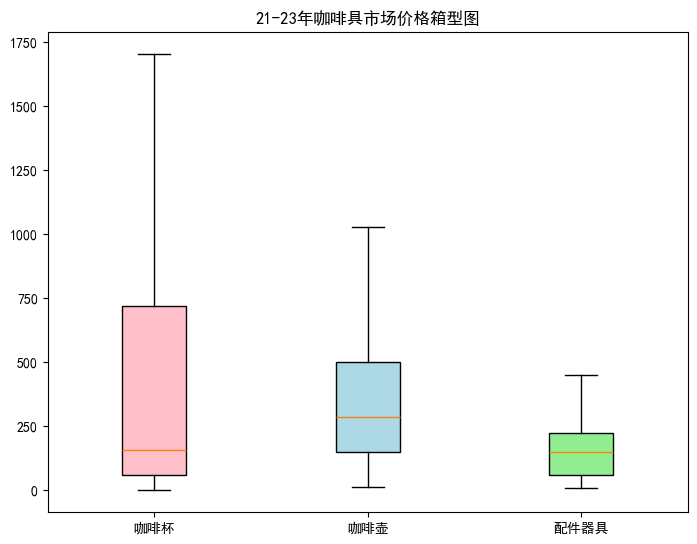

In [11]:
plt.rcParams["font.family"]="SimHei"
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
graph = ax.boxplot(
    [
        coffee_cup_price_list,
        coffee_bottle_price_list,
        coffee_accessory_price_list,
    ],
    vert=True,
    patch_artist=True,
    labels=["咖啡杯", "咖啡壶", "配件器具"],
    showfliers = False
)
ax.set_title("21-23年咖啡具市场价格箱型图")
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(graph['boxes'], colors):
    patch.set_facecolor(color)
plt.show()


In [ ]:
plt.boxplot()

In [10]:
price_ureru = price_df[price_df["品牌"].isin(['小林制药',	'昆中药',	'达芬蓉',	'韩都',	'muhi/池田模范堂',	'东亚制药',	'中州',	'花容美',	'澳琪',	'彤医',	'希力',	'汉立方',	'王老吉',	'德济',	'撒隆巴斯',	'神田',	'谢太公',	'europharm/欧化',	'普林松',	'世康特',	'yeung ng tong/养吾堂'])]


In [14]:
price_urenai = price_df[price_df["品牌"].isin(['盘龙云海',	'明康欣',	'天龙',	'达林',	'克逗',	'安芙平',	'明必欣',	'轰克',	'德众',	'陈老二',	'顺峰',	'邦力',	'第一三共',	'东药',	'goldensun/金日',	'昆中',	'cisen/辰欣',	'慧宝源',	'华北制药',	'鑫烨',	'臣功',	'良福',	'エスエス製薬',	'rohto',	'白云山',	'larlly/来利',	'联邦倍克',	'同济堂',	'豆克',	'育林',	'恒久远',	'许诺',	'集佳',	'新和成',	'悦来',	'维福佳',	'通用',	'科瑞',	'方明',	'shiseido/资生堂',	'云植',	'公益',	'济仁',	'通园',	'立灵奇',	'东泰',	'南国',	'关药师',	'匹得邦',	'槐花维肤膏',	'佑华',	'益民',	'振东',	'鑫煜'])]

In [11]:
sum_price = np.sum(price_ureru["销售额"])
print(sum_price)

14397773.000000002


<function matplotlib.pyplot.show(close=None, block=None)>

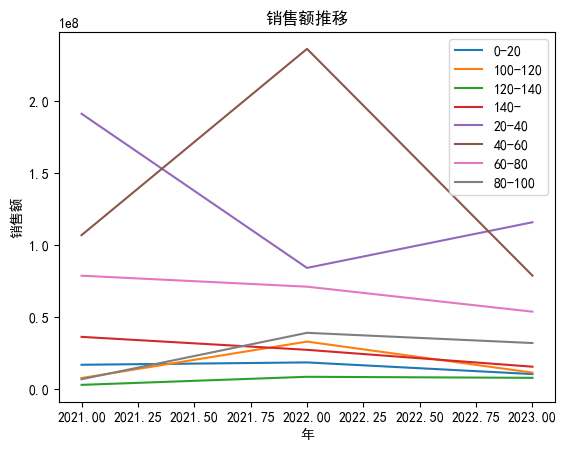

In [37]:
plt.rcParams['font.family'] = ['SimHei']
plt.title("销售额推移")
plt.xlabel("年")
plt.ylabel("销售额")
for layer in price_date_pivotTableY["sum"].columns.tolist():    
    plt.plot(price_date_pivotTableY["sum"].index,price_date_pivotTableY["sum"][layer])
plt.legend(price_date_pivotTableY["sum"].columns.tolist())
plt.show